This is the code goes over tree methods in Python. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('kyphosis.csv')

In [20]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [22]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

## EDA

We'll just check out a simple pairplot for this small dataset.

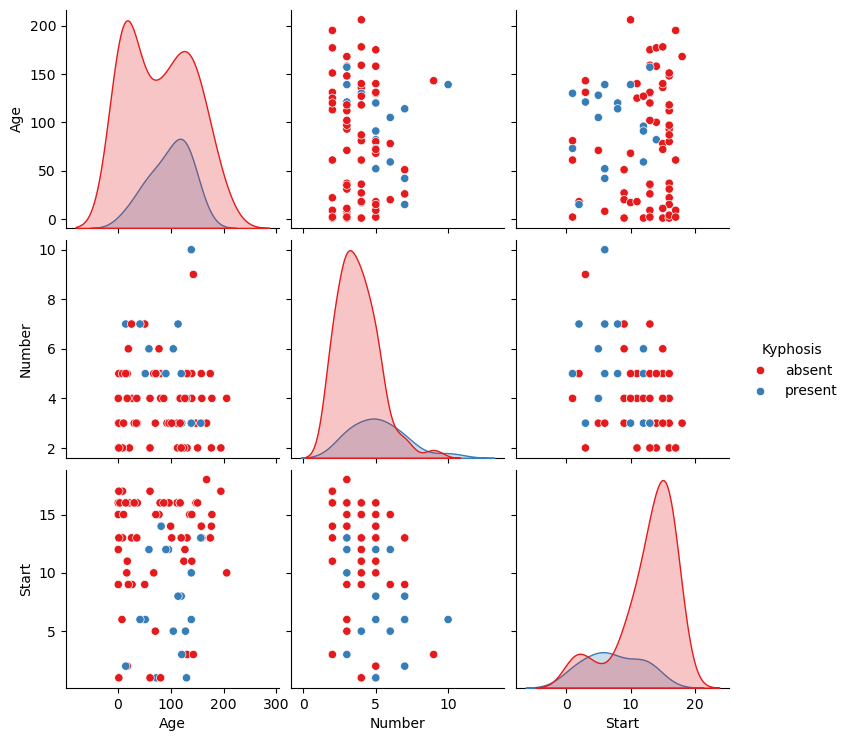

In [8]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [35]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.89      0.86        18
     present       0.67      0.57      0.62         7

    accuracy                           0.80        25
   macro avg       0.75      0.73      0.74        25
weighted avg       0.79      0.80      0.80        25



In [41]:
print(confusion_matrix(y_test,predictions))

[[16  2]
 [ 3  4]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [4]:
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# from sklearn.tree import export_graphviz
# import pydot 

# features = list(df.columns[1:])
# features

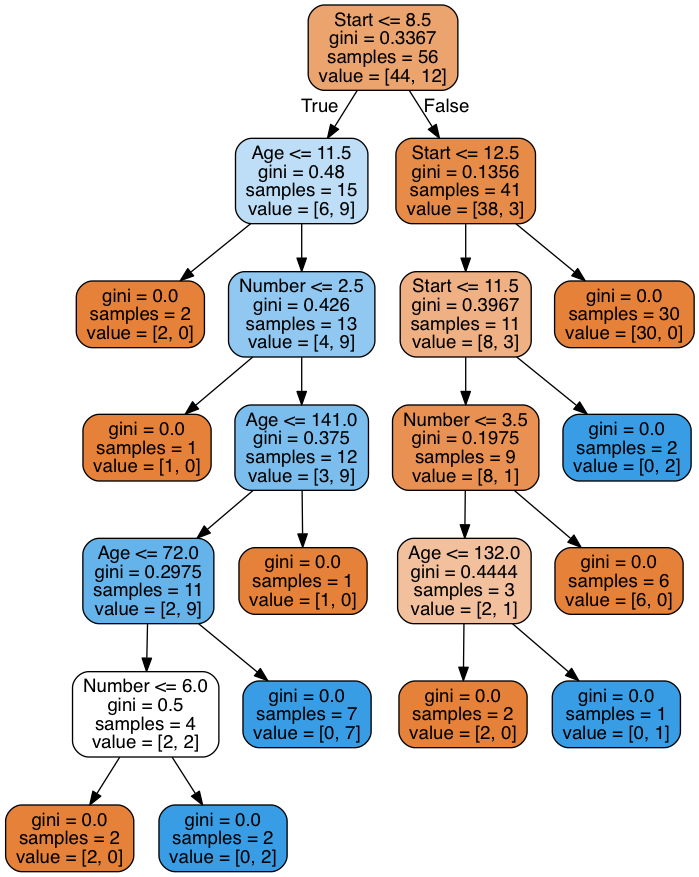

In [39]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(X_test)

In [47]:
print(confusion_matrix(y_test,rfc_pred))

[[17  1]
 [ 4  3]]


In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.81      0.94      0.87        18
     present       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25

